# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries 

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

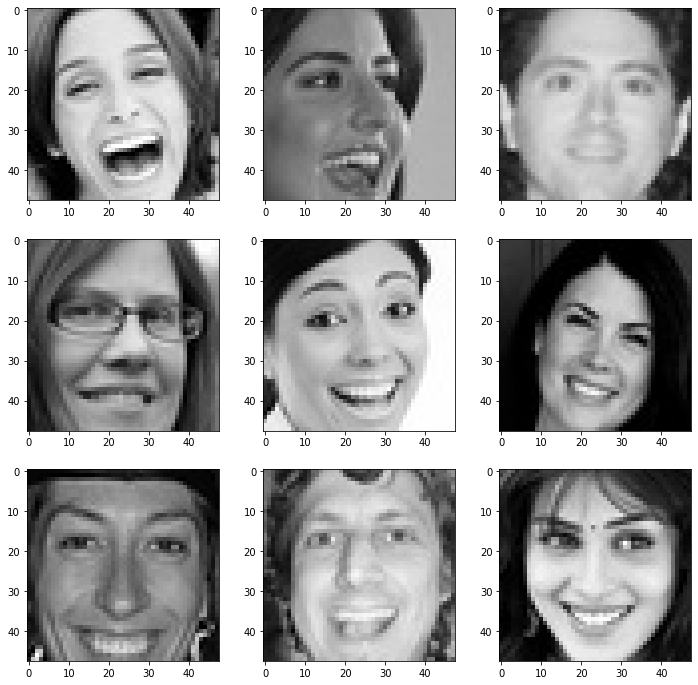

In [3]:
expression = "happy"

plt.figure(figsize = (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/"+expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [4]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train", target_size=(picture_size, picture_size), color_mode="grayscale",
                                             batch_size=batch_size, class_mode="categorical",
                                             shuffle=True)
test_set = datagen_val.flow_from_directory(folder_path+"validation", target_size=(picture_size, picture_size), color_mode="grayscale",
                                             batch_size=batch_size, class_mode="categorical",
                                             shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building 

In [5]:
no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully Connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connecetd  2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# Fitting the model with Training and Validation Data

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('./Emotion_Detection_Model.h5', monitor = 'val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss', factor=0.2,patience=3, verbose=1,min_delta=0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_learning_rate]

epochs = 48

In [7]:
history = model.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size, 
                             epochs= epochs, validation_data=test_set, validation_steps=test_set.n//test_set.batch_size,
                             callbacks = callbacks_list)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
225/225 [==============================] - 137s 580ms/step - loss: 2.1295 - accuracy: 0.2118 - val_loss: 1.7149 - val_accuracy: 0.3190
Epoch 2/48
225/225 [==============================] - 24s 106ms/step - loss: 1.8626 - accuracy: 0.2704 - val_loss: 1.6601 - val_accuracy: 0.3472
Epoch 3/48
225/225 [==============================] - 24s 107ms/step - loss: 1.7671 - accuracy: 0.3206 - val_loss: 1.6469 - val_accuracy: 0.3668
Epoch 4/48
225/225 [==============================] - 24s 106ms/step - loss: 1.6943 - accuracy: 0.3454 - val_loss: 1.6192 - val_accuracy: 0.3817
Epoch 5/48
225/225 [==============================] - 24s 107ms/step - loss: 1.6171 - accuracy: 0.3756 - val_loss: 1.6254 - val_accuracy: 0.3945
Epoch 6/48
225/225 [==============================] - 24s 106ms/step - loss: 1.5724 - accuracy: 0.3937 - val_loss: 1.5823 - val_accuracy: 0.4114
Epoch 7/48
225/225 [==============================] - 24s 106ms/step - loss: 1.5215 - accuracy: 0.4103 - val_loss: 1.4723 - val_a

In [8]:
# model_json = model.to_json()
# with open("emotion_model.json", "w") as json_file:
#     json_file.write(model_json)

In [9]:
model.save('./Emotion_Detection_Model_save.h5')

In [10]:
# model_json = model.to_json()
# with open("emotion_model.json", "w") as json_file:
#     json_file.write(model_json)

# # save trained model weight in .h5 file
# model.save_weights('Emotion_Detection_Model.h5')

# Plotting Accuracy & Loss 

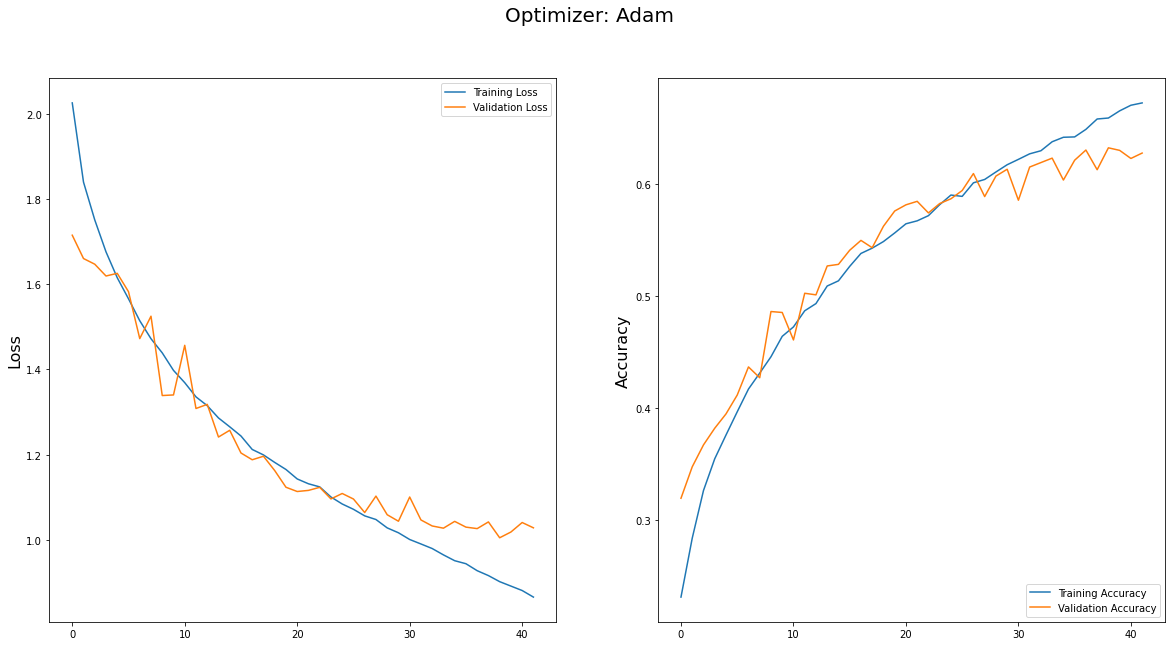

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer: Adam', fontsize = 20)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()